In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use('seaborn')
%matplotlib inline

## Cause 1: CO2 Global Emissions

In [2]:
# Load the global CO2 emissionb dataset and store it in a dataframe
orig_co2_data = pd.read_csv('global_co2.csv')
global_co2_df = orig_co2_data.copy()

global_co2_df.head()

,Entity,Year,CO2 concentrations,CH4 concentrations,N2O concentrations,February,September,Mass U.S. glaciers,CSIRO,IAP,...,NOAA,Snow cover,Sea surface temp,Sea surface temp (lower-bound),Sea surface temp (upper-bound),IAP.1,NOAA.1,MRIJMA.1,February.1,September.1
0,World,1944,312.361640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.19544,-0.04842,0.41542,NaN,NaN,NaN,NaN,NaN
1,World,1945,310.938399,1128.83,287.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.19232,-0.05142,0.40783,NaN,NaN,NaN,NaN,NaN
2,World,1946,312.263411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.07790,-0.24979,0.07413,NaN,NaN,NaN,NaN,NaN
3,World,1947,311.614631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.14807,-0.31854,0.00238,NaN,NaN,NaN,NaN,NaN
4,World,1948,311.570950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.13325,-0.29388,0.00404,NaN,NaN,NaN,NaN,NaN


In [3]:
# Choose the required columns
global_co2_df = global_co2_df[['Year', 'CO2 concentrations']]

# Set the date column as a DateTimeIndex and sort it
global_co2_df.set_index('Year', inplace = True)
global_co2_df.sort_index(axis = 0, inplace = True)

global_co2_df.head()

,CO2 concentrations
Year,
1944,312.361640
1945,310.938399
1946,312.263411
1947,311.614631
1948,311.570950


In [4]:
# Load the global ghg dataset and store it in a dataframe
orig_ghg_data = pd.read_csv('total-ghg-emissions.csv')
global_ghg_df = orig_ghg_data.copy()

global_ghg_df.head()

,Entity,Code,Year,Annual greenhouse gas emissions
0,Afghanistan,AFG,1851,7373214.5
1,Afghanistan,AFG,1852,7422393.5
2,Afghanistan,AFG,1853,7483595.5
3,Afghanistan,AFG,1854,7532321.0
4,Afghanistan,AFG,1855,7580708.5


In [5]:
global_ghg_df = global_ghg_df.groupby('Year').agg({'Annual greenhouse gas emissions': 'sum'})
global_ghg_df.rename(columns = {'Annual greenhouse gas emissions': 'GHG'}, inplace = True)
global_ghg_df.head()

,GHG
Year,
1851,1.657144e+10
1852,1.680544e+10
1853,1.714522e+10
1854,1.752148e+10
1855,1.763788e+10


In [6]:
global_ghg_df.to_csv('global ghg.csv', index=True)

## Cause 2: Global Temperature (Anomalies)

In [7]:
# Load the global temperature dataset and store it in a dataframe
orig_temp_data = pd.read_csv('Global Temperature Anomalies.csv')
global_temp_df = orig_temp_data.copy()

global_temp_df.head()

,Year,Value
0,1850,-0.14
1,1851,-0.08
2,1852,-0.09
3,1853,-0.15
4,1854,-0.19


In [8]:
# Check the number of missing values and the corresponding years
global_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    174 non-null    int64  
 1   Value   174 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB


In [9]:
# Set the date column as a DateTimeIndex and sort it
global_temp_df.set_index('Year', inplace = True)
global_temp_df.sort_index(axis = 0, inplace = True)
global_temp_df.rename(columns = {'Value': 'Temp Anomaly'}, inplace = True)

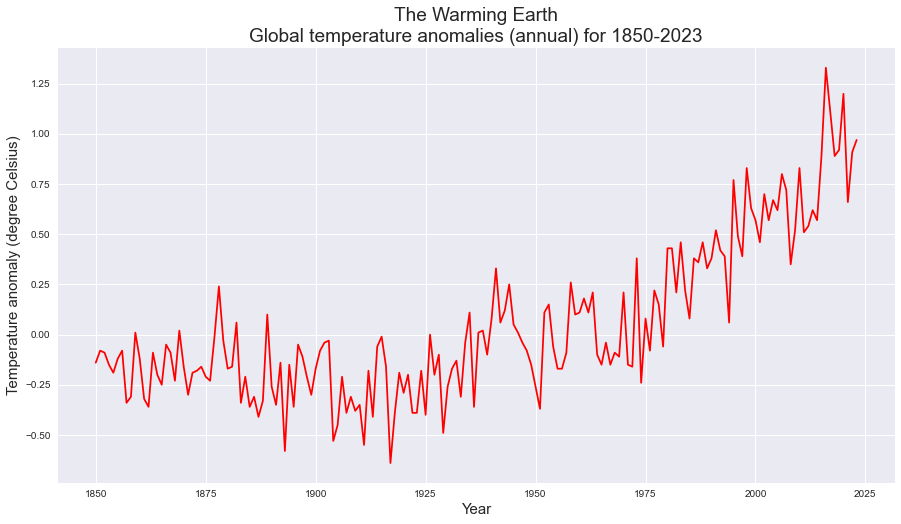

In [10]:
# Plot the temperature anomaly
plt.figure(figsize = (15, 8))

plt.plot(global_temp_df['Temp Anomaly'], 'r')

plt.title('The Warming Earth\nGlobal temperature anomalies (annual) for 1850-2023', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Temperature anomaly (degree Celsius)', fontsize = 15)

plt.savefig('temp.png', dpi=300, bbox_inches='tight')

plt.show()

/var/folders/j7/nfnl2t8n67z4s5c_jkpvv_w80000gn/T/ipykernel_66211/2718068299.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None, which='major', axis='both')


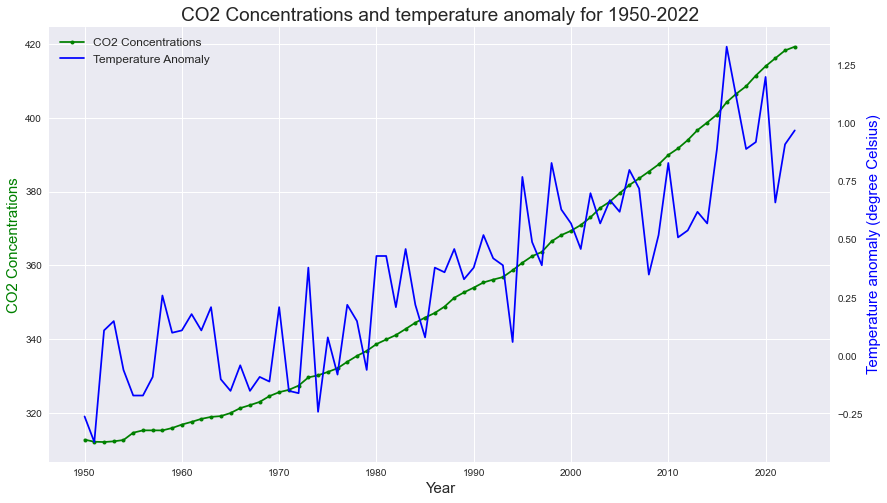

In [11]:
# Plot all CO2 and temperature anomaly for comparison
fig, ax = plt.subplots(figsize = (14, 8))
ax2 = ax.twinx()

line1 = ax.plot(global_co2_df.loc[1950:, 'CO2 concentrations'], '-go', markersize = 4, label = 'CO2 Concentrations')
line2 = ax2.plot(global_temp_df.loc[1950:, 'Temp Anomaly'], 'b-', label = 'Temperature Anomaly')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.title('CO2 Concentrations and temperature anomaly for 1950-2022', fontsize = 19)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('CO2 Concentrations', fontsize = 15, color = 'g')
ax2.set_ylabel('Temperature anomaly (degree Celsius)', fontsize = 15, color = 'b')
ax.legend(lines, labels, loc = 0, prop = {'size': 12})
plt.grid(b=None, which='major', axis='both')

# Save the plot as a PNG file
plt.savefig('CO2.png', dpi=300, bbox_inches='tight')

plt.show()

/var/folders/j7/nfnl2t8n67z4s5c_jkpvv_w80000gn/T/ipykernel_66211/653833242.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None, which='major', axis='both')


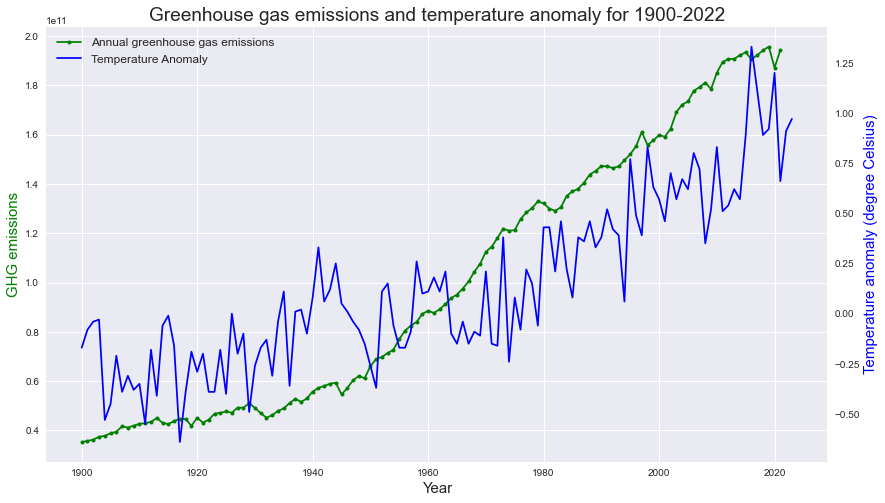

In [12]:
# Plot all greenhouse gas and temperature anomaly for comparison
fig, ax = plt.subplots(figsize = (14, 8))
ax2 = ax.twinx()

line1 = ax.plot(global_ghg_df.loc[1900:, 'GHG'], '-go', markersize = 4, label = 'Annual greenhouse gas emissions')
line2 = ax2.plot(global_temp_df.loc[1900:, 'Temp Anomaly'], 'b-', label = 'Temperature Anomaly')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.title('Greenhouse gas emissions and temperature anomaly for 1900-2022', fontsize = 19)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('GHG emissions', fontsize = 15, color = 'g')
ax2.set_ylabel('Temperature anomaly (degree Celsius)', fontsize = 15, color = 'b')
ax.legend(lines, labels, loc = 0, prop = {'size': 12})
plt.grid(b=None, which='major', axis='both')

# Save the plot as a PNG file
plt.savefig('ghg.png', dpi=300, bbox_inches='tight')

plt.show()

## Effects: Natural Disasters

In [13]:
# Load the natural disaster dataset and store it in a dataframe
orig_disaster_data = pd.read_csv('natural-disasters-by-type.csv')
nat_disaster_df = orig_disaster_data.copy()

nat_disaster_df.head()

,Entity,Code,Year,Number of reported natural disasters
0,All disasters,NaN,1900,6
1,All disasters,NaN,1901,1
2,All disasters,NaN,1902,10
3,All disasters,NaN,1903,12
4,All disasters,NaN,1904,4


In [14]:
# Remove the 'Code' column
nat_disaster_df.drop(['Code'], axis = 1, inplace = True)

# Check the different types of 'Entity' values
nat_disaster_df['Entity'].unique()

array(['All disasters', 'Drought', 'Earthquake', 'Extreme temperature',
       'Extreme weather', 'Flood', 'Fog', 'Glacial lake outburst',
       'Landslide', 'Volcanic activity', 'Wildfire', 'Dry mass movement'],
      dtype=object)

In [15]:
# Pivot the dataframe
nat_disaster_df = nat_disaster_df.pivot(index = 'Year', columns = 'Entity', values = 'Number of reported natural disasters')
nat_disaster_df.head()

Entity,All disasters,Drought,Dry mass movement,Earthquake,Extreme temperature,Extreme weather,Flood,Fog,Glacial lake outburst,Landslide,Volcanic activity,Wildfire
Year,,,,,,,,,,,,
1900,6.0,2.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
1901,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,10.0,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN
1903,12.0,1.0,1.0,5.0,NaN,2.0,2.0,NaN,NaN,NaN,1.0,NaN
1904,4.0,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN



There are several 'NaN' values which could mean missing values or unreported disaster occurrences. For our analysis, we'll replace them with 0, which means no disaster occurrence and it would also benefit plotting the data.

In [16]:
# Remove the 'Fog' and 'Glacial lake outburst' column
nat_disaster_df.drop(['Fog'], axis = 1, inplace = True)
nat_disaster_df.drop(['Glacial lake outburst'], axis = 1, inplace = True)

# Handle missing values and rename columns
nat_disaster_df.fillna(value = 0, inplace = True)

nat_disaster_df.head()

Entity,All disasters,Drought,Dry mass movement,Earthquake,Extreme temperature,Extreme weather,Flood,Landslide,Volcanic activity,Wildfire
Year,,,,,,,,,,
1900,6.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1901,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,10.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,5.0,0.0
1903,12.0,1.0,1.0,5.0,0.0,2.0,2.0,0.0,1.0,0.0
1904,4.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0


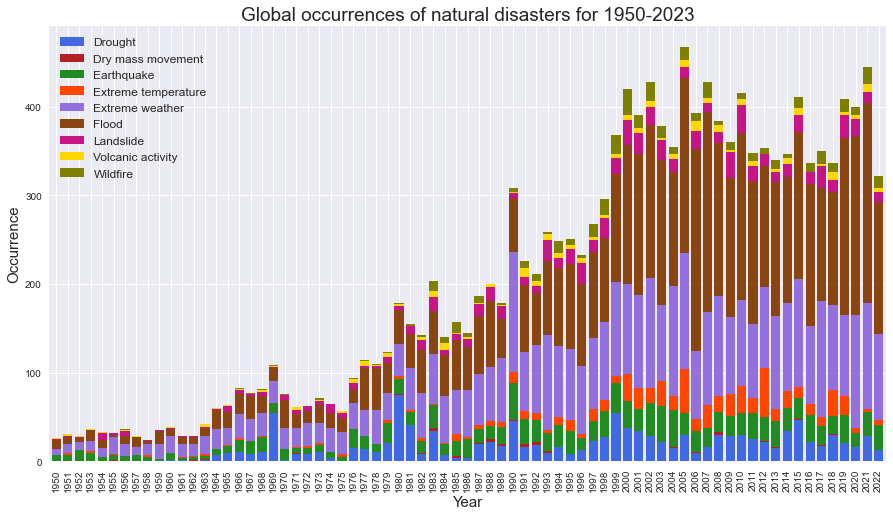

In [17]:
# Plot the types of natural disasters occurrences for 1950-2018
colors = ['#4169e1', '#b22222', '#228b22', '#ff4500', '#9370db', '#8b4513', '#c71585', '#ffd700', 'olive']

nat_disaster_df.drop(['All disasters'], axis = 1).loc[1950:].plot.bar(width = 0.8, stacked = True, color = colors, figsize = (15, 8))

plt.title('Global occurrences of natural disasters for 1950-2023', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Occurrence', fontsize = 15)
plt.legend(loc = 2, prop = {'size': 12})

plt.show()

/var/folders/j7/nfnl2t8n67z4s5c_jkpvv_w80000gn/T/ipykernel_66211/1541229958.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None, which='major', axis='both')


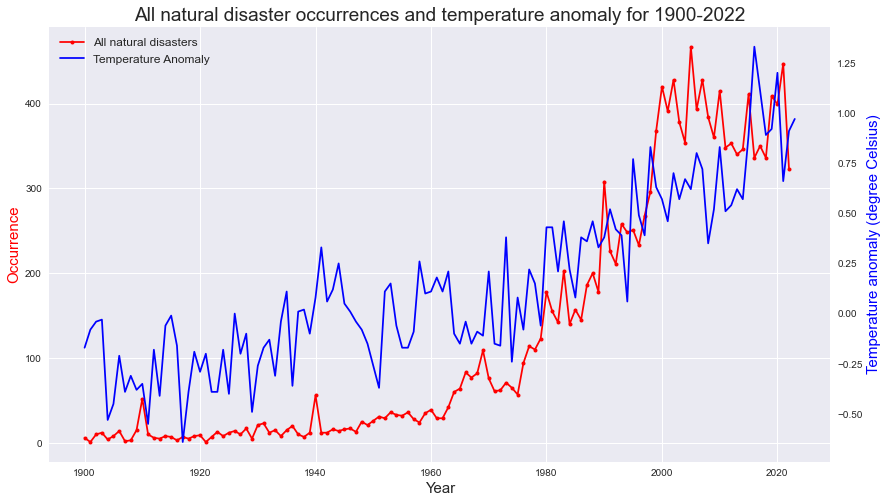

In [18]:
# Plot all natural disasters occurrences and temperature anomaly for comparison
fig, ax = plt.subplots(figsize = (14, 8))
ax2 = ax.twinx()

line1 = ax.plot(nat_disaster_df.loc[1900:2022, 'All disasters'], '-ro', markersize = 4, label = 'All natural disasters')
line2 = ax2.plot(global_temp_df.loc[1900:, 'Temp Anomaly'], 'b-', label = 'Temperature Anomaly')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.title('All natural disaster occurrences and temperature anomaly for 1900-2022', fontsize = 19)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Occurrence', fontsize = 15, color = 'r')
ax2.set_ylabel('Temperature anomaly (degree Celsius)', fontsize = 15, color = 'b')
ax.legend(lines, labels, loc = 0, prop = {'size': 12})
plt.grid(b=None, which='major', axis='both')

# Save the plot as a PNG file
plt.savefig('natural disaster_anomalies.png', dpi=300, bbox_inches='tight')

plt.show()

In [19]:
combined_df = global_temp_df.join([global_ghg_df,nat_disaster_df], how = 'inner')

# Choose the required columns
corr_df = combined_df[['Temp Anomaly', 'GHG', 'All disasters']]

corr_df.head()

,Temp Anomaly,GHG,All disasters
Year,,,
1900,-0.17,3.531699e+10,6.0
1901,-0.08,3.577868e+10,1.0
1902,-0.04,3.629269e+10,10.0
1903,-0.03,3.742453e+10,12.0
1904,-0.53,3.783647e+10,4.0


In [20]:
correlation_table = combined_df.corr()
correlation_table

,Temp Anomaly,GHG,All disasters,Drought,Dry mass movement,Earthquake,Extreme temperature,Extreme weather,Flood,Landslide,Volcanic activity,Wildfire
Temp Anomaly,1.000000,0.856932,0.851619,0.558084,0.295312,0.756170,0.633519,0.845501,0.829991,0.785547,0.635423,0.707686
GHG,0.856932,1.000000,0.929074,0.639418,0.361243,0.851380,0.710902,0.929955,0.888436,0.850137,0.735876,0.736013
All disasters,0.851619,0.929074,1.000000,0.685982,0.325903,0.888347,0.809262,0.970711,0.973849,0.883620,0.767099,0.853765
Drought,0.558084,0.639418,0.685982,1.000000,0.271658,0.646660,0.492013,0.645522,0.572293,0.560327,0.494056,0.556151
Dry mass movement,0.295312,0.361243,0.325903,0.271658,1.000000,0.365182,0.198579,0.399132,0.236968,0.329069,0.377538,0.203553
Earthquake,0.756170,0.851380,0.888347,0.646660,0.365182,1.000000,0.691783,0.886684,0.810549,0.771690,0.683834,0.780799
Extreme temperature,0.633519,0.710902,0.809262,0.492013,0.198579,0.691783,1.000000,0.744219,0.791604,0.689314,0.538438,0.667518
Extreme weather,0.845501,0.929955,0.970711,0.645522,0.399132,0.886684,0.744219,1.000000,0.915936,0.860951,0.740401,0.811662
Flood,0.829991,0.888436,0.973849,0.572293,0.236968,0.810549,0.791604,0.915936,1.000000,0.847628,0.753970,0.824171
Landslide,0.785547,0.850137,0.883620,0.560327,0.329069,0.771690,0.689314,0.860951,0.847628,1.000000,0.654099,0.762817


In [21]:
corr_table = corr_df.corr()
corr_table

,Temp Anomaly,GHG,All disasters
Temp Anomaly,1.000000,0.856932,0.851619
GHG,0.856932,1.000000,0.929074
All disasters,0.851619,0.929074,1.000000


In [22]:
# Correlation with respect to temperature anomaly
combined_df.corr()['Temp Anomaly']

Temp Anomaly           1.000000
GHG                    0.856932
All disasters          0.851619
Drought                0.558084
Dry mass movement      0.295312
Earthquake             0.756170
Extreme temperature    0.633519
Extreme weather        0.845501
Flood                  0.829991
Landslide              0.785547
Volcanic activity      0.635423
Wildfire               0.707686
Name: Temp Anomaly, dtype: float64

/var/folders/j7/nfnl2t8n67z4s5c_jkpvv_w80000gn/T/ipykernel_66211/3357432622.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(cax, shrink = 0.82)


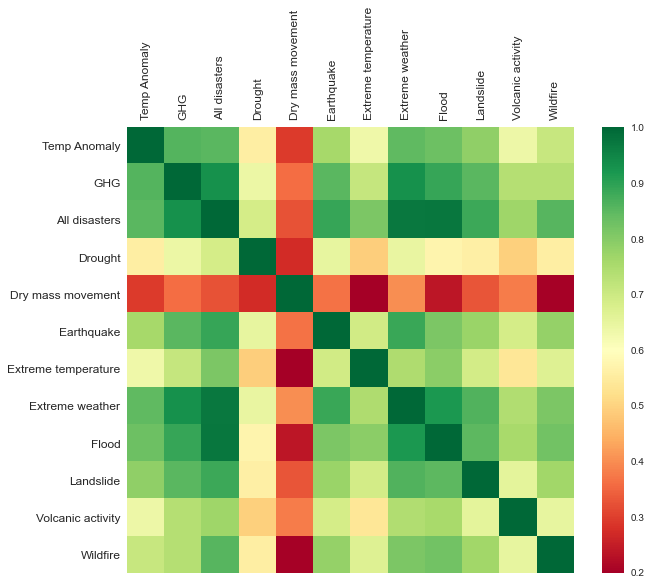

In [23]:
# Plot correlation heatmap
fig, ax = plt.subplots(figsize = (10, 10))

labels = [name for name in correlation_table.columns]

cax = ax.matshow(correlation_table, cmap = 'RdYlGn')

cbar = fig.colorbar(cax, shrink = 0.82)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels, fontsize = 12, rotation = 'vertical')
ax.set_yticklabels(labels, fontsize = 12)

ax.grid(False)

# Save the plot as a PNG file
plt.savefig('all correlation.png', dpi=300, bbox_inches='tight')

plt.show()

/var/folders/j7/nfnl2t8n67z4s5c_jkpvv_w80000gn/T/ipykernel_66211/4092490622.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(cax, shrink = 0.82)


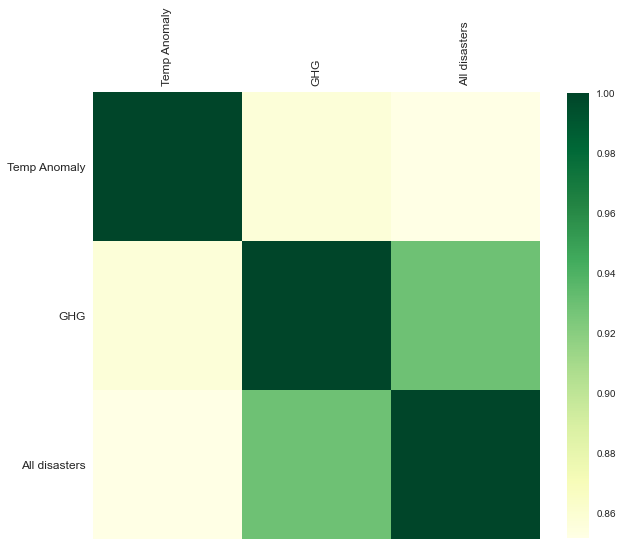

In [24]:
# Plot correlation heatmap
fig, ax = plt.subplots(figsize = (10, 10))

labels = [name for name in corr_table.columns]

cax = ax.matshow(corr_table, cmap = 'YlGn')

cbar = fig.colorbar(cax, shrink = 0.82)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels, fontsize = 12, rotation = 'vertical')
ax.set_yticklabels(labels, fontsize = 12)

ax.grid(False)

# Save the plot as a PNG file
plt.savefig('nat_temp_co2 correlation.png', dpi=300, bbox_inches='tight')

plt.show()

/var/folders/j7/nfnl2t8n67z4s5c_jkpvv_w80000gn/T/ipykernel_66211/3799490276.py:23: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


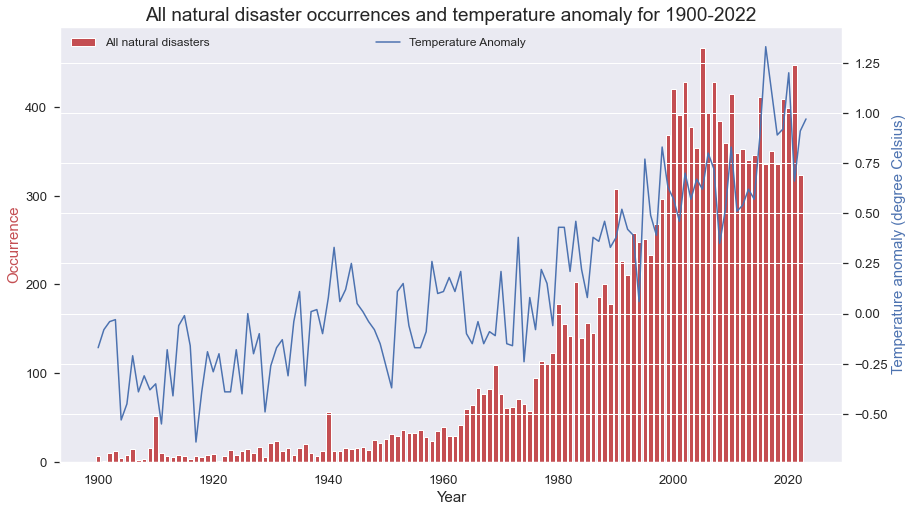

In [38]:
import matplotlib.pyplot as plt

# Plot all natural disasters occurrences
fig, ax1 = plt.subplots(figsize = (14, 8))

ax1.bar(nat_disaster_df.index, nat_disaster_df['All disasters'], 
        label = 'All natural disasters', color='r', alpha=1)
ax1.set_xlabel('Year', fontsize = 15)
ax1.set_ylabel('Occurrence', fontsize = 15, color = 'r')

# Plot temperature anomaly
ax2 = ax1.twinx()

ax2.plot(global_temp_df.loc[1900:, 'Temp Anomaly'], 'b-', label = 'Temperature Anomaly')
ax2.set_ylabel('Temperature anomaly (degree Celsius)', fontsize = 15, color = 'b')

# Set title and legend
plt.title('All natural disaster occurrences and temperature anomaly for 1900-2022', fontsize = 19)
ax1.legend(loc = 0, prop = {'size': 12})
ax2.legend(loc = 9, prop = {'size': 12})

# Remove the grid lines
ax1.grid(b=False)

# Save the plot as a PNG file
plt.savefig('natural_disaster_and_temperature_anomaly.png', dpi=300, bbox_inches='tight')

plt.show()


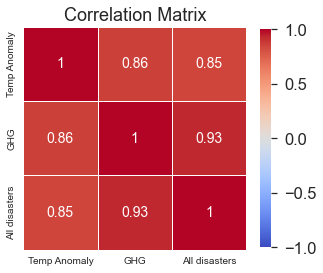

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation heatmap
fig, ax = plt.subplots(figsize = (5, 5))

corr_table = corr_table.round(2)

sns.set(font_scale=1.5)
sns.heatmap(corr_table, annot=True, annot_kws={"size": 14}, cmap='coolwarm', 
            vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix', fontsize = 18)

# Save the plot as a PNG file
plt.savefig('nat_temp_co2 correlation.png', dpi=300, bbox_inches='tight')

plt.show()


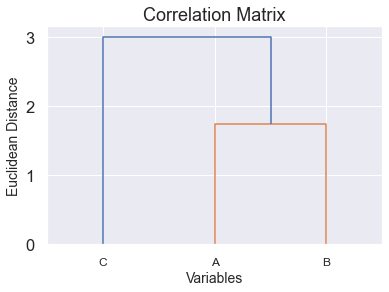

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import pandas as pd

# Define correlation matrix and labels
correlation_table = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]})
labels = correlation_table.columns.tolist()

# Create dendrogram
dendrogram = sch.dendrogram(sch.linkage(correlation_table, method='ward'), labels=labels)

# Set plot title and axis labels
plt.title('Correlation Matrix', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Euclidean Distance', fontsize=14)

# Save the plot as a PNG file
plt.savefig('all correlation.png', dpi=300, bbox_inches='tight')

plt.show()


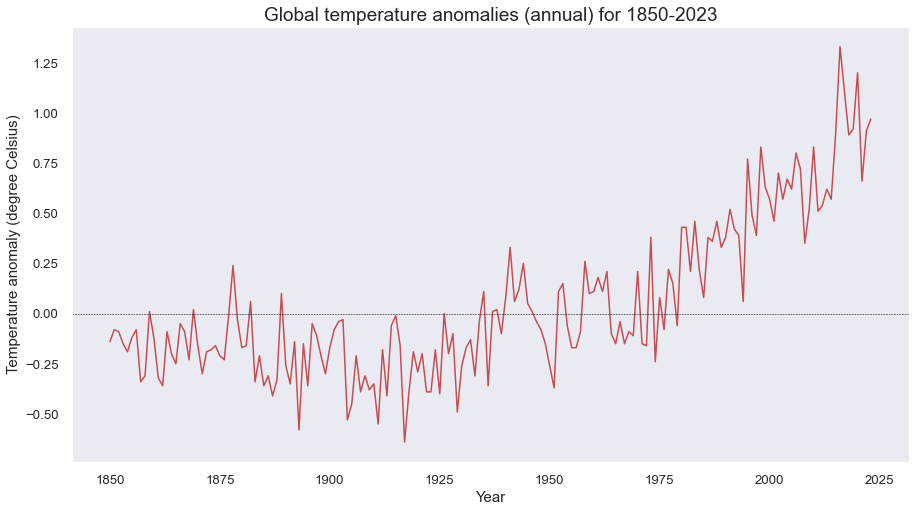

In [37]:
# Plot the temperature anomaly
plt.figure(figsize=(15, 8), facecolor='w')

plt.plot(global_temp_df['Temp Anomaly'], 'r')

# Add horizontal dotted line for 0 axis
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

plt.title('Global temperature anomalies (annual) for 1850-2023', fontsize=19)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Temperature anomaly (degree Celsius)', fontsize=15)

# Remove the grid lines
plt.grid(False)

plt.savefig('temp.png', dpi=300, bbox_inches='tight')

plt.show()
